# Challenge1

## Download 20 random stocks and

### 1. Calculate risk and reward potential
### 2. Compare the covariance and correlation
### 3. Find the best 5 to invest in long term

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stockList = ["FB", "AMZN", "TSLA", "TSM", "JNJ", "NVDA", "JPM", "PG", "BAC", "BABA", "COST", "ADBE", "ORCL", "MCD", "NKE", "WFC", "PYPL", "NFLX", "MMM", "PNC"]

In [3]:
stocks = yf.download(stockList, start = "2015-08-01", end = "2022-05-01")

[*********************100%***********************]  20 of 20 completed


In [4]:
stocks

Adj Close                                                 \
                  ADBE         AMZN       BABA        BAC        COST   
Date                                                                    
2015-08-03   81.400002   535.030029  77.989998  15.629393  127.349670   
2015-08-04   82.059998   531.900024  78.870003  15.655777  126.754585   
2015-08-05   83.379997   537.010010  79.820000  15.717353  128.548553   
2015-08-06   82.190002   529.460022  78.959999  15.664574  128.154785   
2015-08-07   82.690002   522.619995  78.820000  15.611807  127.122116   
...                ...          ...        ...        ...         ...   
2022-04-25  413.950012  2921.479980  85.839996  37.290001  567.287109   
2022-04-26  399.119995  2787.820068  83.989998  36.450001  552.860535   
2022-04-27  397.899994  2763.340088  88.320000  36.250000  553.180054   
2022-04-28  410.529999  2891.929932  90.910004  36.810001  562.000000   
2022-04-29  395.950012  2485.629883  97.089996  35.680000  531.719971   

                                                                        ...  \
                    FB         JNJ         JPM         MCD         MMM  ...   
Date                                                                    ...   
2015-08-03   94.139999   82.914101   56.896290   83.536667  121.692368  ...   
2015-08-04   94.059998   82.731705   56.838177   83.301430  121.919350  ...   
2015-08-05   96.440002   83.328590   57.062340   83.855980  122.413826  ...   
2015-08-06   95.120003   82.126564   56.663830   83.477859  120.995232  ...   
2015-08-07   94.300003   81.944221   56.497772   83.116554  120.695312  ...   
...                ...         ...         ...         ...         ...  ...   
2022-04-25  186.990005  184.822342  126.769997  252.880005  147.113312  ...   
2022-04-26  180.949997  183.500824  123.019997  248.580002  142.777130  ...   
2022-04-27  174.949997  180.937317  121.419998  247.139999  142.767227  ...   
2022-04-28  205.729996  182.288635  123.339996  254.190002  145.667908  ...   
2022-04-29  200.470001  179.307785  119.360001  249.160004  142.777130  ...   

              Volume                                                   \
                NFLX      NKE       NVDA      ORCL        PG      PNC   
Date                                                                    
2015-08-03  10144800  4992000   39713200  12444500   9511300  1578000   
2015-08-04  29653300  5229000   26010000   9697300  13369100  1420800   
2015-08-05  26946500  6853000   23462800  11982000  10895400  1175900   
2015-08-06  24716700  6211400   65567600  10613000   9353300  1562900   
2015-08-07  17360700  5907800  140524800  10655100  10045400  1557600   
...              ...      ...        ...       ...       ...      ...   
2022-04-25  28152000  6512500   64156600   7305900   6986800  3113700   
2022-04-26  20318100  7977900   65314300   7555200   7769500  2489400   
2022-04-27  22298400  6007800   49946000   7279200   6754900  2405500   
2022-04-28  21363200  6551600   57032700   6177900   9306800  2930400   
2022-04-29  16356600  5866300   50001100   7945400  10636000  3452800   

                                                    
                PYPL      TSLA       TSM       WFC  
Date                                                
2015-08-03  15126600  12767500  11945800  13085900  
2015-08-04  10992200  11762500  13832400  12324700  
2015-08-05   9463100  31071500   7506500  12032500  
2015-08-06   7324100  73119000  12945100  12556600  
2015-08-07   8331300  25367000  16644500  13596200  
...              ...       ...       ...       ...  
2022-04-25  15683400  22780400  10654400  30045500  
2022-04-26  17205300  45377900  14176000  21527400  
2022-04-27  24669800  25652100  15846300  19520900  
2022-04-28  42836600  41649500  15176200  17431000  
2022-04-29  24864000  29313400  10623500  27143100  

[1699 rows x 120 columns]

In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1699 entries, 2015-08-03 to 2022-04-29
Columns: 120 entries, ('Adj Close', 'ADBE') to ('Volume', 'WFC')
dtypes: float64(100), int64(20)
memory usage: 1.6 MB


In [6]:
stocks.describe()

Adj Close                                                      \
              ADBE         AMZN         BABA          BAC         COST   
count  1699.000000  1699.000000  1699.000000  1699.000000  1699.000000   
mean    284.947446  1834.871142   160.557575    26.189730   252.589500   
std     168.137812   992.182196    58.636814     9.173211   120.277441   
min      73.849998   463.369995    57.389999     9.874972   116.458496   
25%     129.970001   898.405029   105.399998    20.778150   148.430679   
50%     257.089996  1739.209961   169.100006    26.070717   215.646179   
75%     439.005005  3000.395020   197.375000    29.482893   325.686417   
max     688.369995  3731.409912   317.140015    49.139740   607.062317   

                                                                        ...  \
                FB          JNJ          JPM          MCD          MMM  ...   
count  1699.000000  1699.000000  1699.000000  1699.000000  1699.000000  ...   
mean    193.038935   125.304022    98.121993   165.600767   162.153073  ...   
std      71.968994    24.889658    32.476808    49.134591    22.674949  ...   
min      82.089996    75.788307    44.676411    76.638306   108.974602  ...   
25%     138.375000   108.141174    75.692070   115.571815   146.611168  ...   
50%     178.389999   122.929810    95.847435   163.068954   161.524414  ...   
75%     230.139999   140.975723   117.446217   204.385941   178.626701  ...   
max     382.179993   184.822342   169.500061   268.198029   223.317749  ...   

             Volume                                                          \
               NFLX           NKE          NVDA          ORCL            PG   
count  1.699000e+03  1.699000e+03  1.699000e+03  1.699000e+03  1.699000e+03   
mean   9.098071e+06  7.877360e+06  4.883211e+07  1.374041e+07  8.726338e+06   
std    7.692937e+06  4.337789e+06  2.812777e+07  7.540022e+06  6.233029e+06   
min    1.144000e+06  1.821900e+06  5.244800e+06  3.331700e+06  2.022100e+06   
25%    4.624900e+06  5.386350e+06  3.072100e+07  9.150300e+06  6.078500e+06   
50%    6.821600e+06  6.918200e+06  4.205910e+07  1.200020e+07  7.451200e+06   
75%    1.103155e+07  8.886750e+06  5.910980e+07  1.591160e+07  9.464650e+06   
max    1.333875e+08  5.731940e+07  3.692928e+08  7.517600e+07  1.237357e+08   

                                                                             
                PNC          PYPL          TSLA           TSM           WFC  
count  1.699000e+03  1.699000e+03  1.699000e+03  1.699000e+03  1.699000e+03  
mean   2.282906e+06  9.101466e+06  3.909666e+07  8.386974e+06  2.525323e+07  
std    9.663039e+05  6.278686e+06  2.827025e+07  4.255375e+06  1.359748e+07  
min    5.188000e+05  1.680000e+06  3.540000e+06  1.499700e+06  4.635500e+06  
25%    1.632500e+06  5.775650e+06  2.168625e+07  5.683700e+06  1.640690e+07  
50%    2.069500e+06  7.522000e+06  3.032000e+07  7.432100e+06  2.098570e+07  
75%    2.702400e+06  1.028670e+07  4.521975e+07  1.006925e+07  2.991890e+07  
max    9.921300e+06  1.362640e+08  3.046940e+08  5.202000e+07  1.189526e+08  

[8 rows x 120 columns]

In [7]:
stocks.to_csv("challenge1.csv")

In [8]:
stocks = pd.read_csv("challenge1.csv")
stocks

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Volume.10,Volume.11,Volume.12,Volume.13,Volume.14,Volume.15,Volume.16,Volume.17,Volume.18,Volume.19
0,NaN,ADBE,AMZN,BABA,BAC,COST,FB,JNJ,JPM,MCD,...,NFLX,NKE,NVDA,ORCL,PG,PNC,PYPL,TSLA,TSM,WFC
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-03,81.4000015258789,535.030029296875,77.98999786376953,15.629392623901367,127.34967041015625,94.13999938964844,82.91410064697266,56.89628982543945,83.53666687011719,...,10144800,4992000,39713200,12444500,9511300,1578000,15126600,12767500,11945800,13085900
3,2015-08-04,82.05999755859375,531.9000244140625,78.87000274658203,15.655776977539062,126.75458526611328,94.05999755859375,82.73170471191406,56.83817672729492,83.30142974853516,...,29653300,5229000,26010000,9697300,13369100,1420800,10992200,11762500,13832400,12324700
4,2015-08-05,83.37999725341797,537.010009765625,79.81999969482422,15.717352867126465,128.54855346679688,96.44000244140625,83.3285903930664,57.062339782714844,83.8559799194336,...,26946500,6853000,23462800,11982000,10895400,1175900,9463100,31071500,7506500,12032500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2022-04-25,413.95001220703125,2921.47998046875,85.83999633789062,37.290000915527344,567.287109375,186.99000549316406,184.8223419189453,126.7699966430664,252.8800048828125,...,28152000,6512500,64156600,7305900,6986800,3113700,15683400,22780400,10654400,30045500
1697,2022-04-26,399.1199951171875,2787.820068359375,83.98999786376953,36.45000076293945,552.8605346679688,180.9499969482422,183.50082397460938,123.0199966430664,248.5800018310547,...,20318100,7977900,65314300,7555200,7769500,2489400,17205300,45377900,14176000,21527400
1698,2022-04-27,397.8999938964844,2763.340087890625,88.31999969482422,36.25,553.1800537109375,174.9499969482422,180.93731689453125,121.41999816894531,247.13999938964844,...,22298400,6007800,49946000,7279200,6754900,2405500,24669800,25652100,15846300,19520900
1699,2022-04-28,410.5299987792969,2891.929931640625,90.91000366210938,36.810001373291016,562.0,205.72999572753906,182.28863525390625,123.33999633789062,254.19000244140625,...,21363200,6551600,57032700,6177900,9306800,2930400,42836600,41649500,15176200,17431000


In [9]:
stocks = pd.read_csv("challenge1.csv", header=[0,1], index_col=[0])

In [10]:
stocks

Adj Close                                                 \
                  ADBE         AMZN       BABA        BAC        COST   
Date                                                                    
2015-08-03   81.400002   535.030029  77.989998  15.629393  127.349670   
2015-08-04   82.059998   531.900024  78.870003  15.655777  126.754585   
2015-08-05   83.379997   537.010010  79.820000  15.717353  128.548553   
2015-08-06   82.190002   529.460022  78.959999  15.664574  128.154785   
2015-08-07   82.690002   522.619995  78.820000  15.611807  127.122116   
...                ...          ...        ...        ...         ...   
2022-04-25  413.950012  2921.479980  85.839996  37.290001  567.287109   
2022-04-26  399.119995  2787.820068  83.989998  36.450001  552.860535   
2022-04-27  397.899994  2763.340088  88.320000  36.250000  553.180054   
2022-04-28  410.529999  2891.929932  90.910004  36.810001  562.000000   
2022-04-29  395.950012  2485.629883  97.089996  35.680000  531.719971   

                                                                        ...  \
                    FB         JNJ         JPM         MCD         MMM  ...   
Date                                                                    ...   
2015-08-03   94.139999   82.914101   56.896290   83.536667  121.692368  ...   
2015-08-04   94.059998   82.731705   56.838177   83.301430  121.919350  ...   
2015-08-05   96.440002   83.328590   57.062340   83.855980  122.413826  ...   
2015-08-06   95.120003   82.126564   56.663830   83.477859  120.995232  ...   
2015-08-07   94.300003   81.944221   56.497772   83.116554  120.695312  ...   
...                ...         ...         ...         ...         ...  ...   
2022-04-25  186.990005  184.822342  126.769997  252.880005  147.113312  ...   
2022-04-26  180.949997  183.500824  123.019997  248.580002  142.777130  ...   
2022-04-27  174.949997  180.937317  121.419998  247.139999  142.767227  ...   
2022-04-28  205.729996  182.288635  123.339996  254.190002  145.667908  ...   
2022-04-29  200.470001  179.307785  119.360001  249.160004  142.777130  ...   

              Volume                                                   \
                NFLX      NKE       NVDA      ORCL        PG      PNC   
Date                                                                    
2015-08-03  10144800  4992000   39713200  12444500   9511300  1578000   
2015-08-04  29653300  5229000   26010000   9697300  13369100  1420800   
2015-08-05  26946500  6853000   23462800  11982000  10895400  1175900   
2015-08-06  24716700  6211400   65567600  10613000   9353300  1562900   
2015-08-07  17360700  5907800  140524800  10655100  10045400  1557600   
...              ...      ...        ...       ...       ...      ...   
2022-04-25  28152000  6512500   64156600   7305900   6986800  3113700   
2022-04-26  20318100  7977900   65314300   7555200   7769500  2489400   
2022-04-27  22298400  6007800   49946000   7279200   6754900  2405500   
2022-04-28  21363200  6551600   57032700   6177900   9306800  2930400   
2022-04-29  16356600  5866300   50001100   7945400  10636000  3452800   

                                                    
                PYPL      TSLA       TSM       WFC  
Date                                                
2015-08-03  15126600  12767500  11945800  13085900  
2015-08-04  10992200  11762500  13832400  12324700  
2015-08-05   9463100  31071500   7506500  12032500  
2015-08-06   7324100  73119000  12945100  12556600  
2015-08-07   8331300  25367000  16644500  13596200  
...              ...       ...       ...       ...  
2022-04-25  15683400  22780400  10654400  30045500  
2022-04-26  17205300  45377900  14176000  21527400  
2022-04-27  24669800  25652100  15846300  19520900  
2022-04-28  42836600  41649500  15176200  17431000  
2022-04-29  24864000  29313400  10623500  27143100  

[1699 rows x 120 columns]

In [11]:
stocks = pd.read_csv("challenge1.csv", header=[0,1], index_col=[0], parse_dates=[0])
stocks

Adj Close                                                 \
                  ADBE         AMZN       BABA        BAC        COST   
Date                                                                    
2015-08-03   81.400002   535.030029  77.989998  15.629393  127.349670   
2015-08-04   82.059998   531.900024  78.870003  15.655777  126.754585   
2015-08-05   83.379997   537.010010  79.820000  15.717353  128.548553   
2015-08-06   82.190002   529.460022  78.959999  15.664574  128.154785   
2015-08-07   82.690002   522.619995  78.820000  15.611807  127.122116   
...                ...          ...        ...        ...         ...   
2022-04-25  413.950012  2921.479980  85.839996  37.290001  567.287109   
2022-04-26  399.119995  2787.820068  83.989998  36.450001  552.860535   
2022-04-27  397.899994  2763.340088  88.320000  36.250000  553.180054   
2022-04-28  410.529999  2891.929932  90.910004  36.810001  562.000000   
2022-04-29  395.950012  2485.629883  97.089996  35.680000  531.719971   

                                                                        ...  \
                    FB         JNJ         JPM         MCD         MMM  ...   
Date                                                                    ...   
2015-08-03   94.139999   82.914101   56.896290   83.536667  121.692368  ...   
2015-08-04   94.059998   82.731705   56.838177   83.301430  121.919350  ...   
2015-08-05   96.440002   83.328590   57.062340   83.855980  122.413826  ...   
2015-08-06   95.120003   82.126564   56.663830   83.477859  120.995232  ...   
2015-08-07   94.300003   81.944221   56.497772   83.116554  120.695312  ...   
...                ...         ...         ...         ...         ...  ...   
2022-04-25  186.990005  184.822342  126.769997  252.880005  147.113312  ...   
2022-04-26  180.949997  183.500824  123.019997  248.580002  142.777130  ...   
2022-04-27  174.949997  180.937317  121.419998  247.139999  142.767227  ...   
2022-04-28  205.729996  182.288635  123.339996  254.190002  145.667908  ...   
2022-04-29  200.470001  179.307785  119.360001  249.160004  142.777130  ...   

              Volume                                                   \
                NFLX      NKE       NVDA      ORCL        PG      PNC   
Date                                                                    
2015-08-03  10144800  4992000   39713200  12444500   9511300  1578000   
2015-08-04  29653300  5229000   26010000   9697300  13369100  1420800   
2015-08-05  26946500  6853000   23462800  11982000  10895400  1175900   
2015-08-06  24716700  6211400   65567600  10613000   9353300  1562900   
2015-08-07  17360700  5907800  140524800  10655100  10045400  1557600   
...              ...      ...        ...       ...       ...      ...   
2022-04-25  28152000  6512500   64156600   7305900   6986800  3113700   
2022-04-26  20318100  7977900   65314300   7555200   7769500  2489400   
2022-04-27  22298400  6007800   49946000   7279200   6754900  2405500   
2022-04-28  21363200  6551600   57032700   6177900   9306800  2930400   
2022-04-29  16356600  5866300   50001100   7945400  10636000  3452800   

                                                    
                PYPL      TSLA       TSM       WFC  
Date                                                
2015-08-03  15126600  12767500  11945800  13085900  
2015-08-04  10992200  11762500  13832400  12324700  
2015-08-05   9463100  31071500   7506500  12032500  
2015-08-06   7324100  73119000  12945100  12556600  
2015-08-07   8331300  25367000  16644500  13596200  
...              ...       ...       ...       ...  
2022-04-25  15683400  22780400  10654400  30045500  
2022-04-26  17205300  45377900  14176000  21527400  
2022-04-27  24669800  25652100  15846300  19520900  
2022-04-28  42836600  41649500  15176200  17431000  
2022-04-29  24864000  29313400  10623500  27143100  

[1699 rows x 120 columns]

In [12]:
close = stocks.loc[:,"Adj Close"].copy()

In [13]:
close

,ADBE,AMZN,BABA,BAC,COST,FB,JNJ,JPM,MCD,MMM,NFLX,NKE,NVDA,ORCL,PG,PNC,PYPL,TSLA,TSM,WFC
Date,,,,,,,,,,,,,,,,,,,,
2015-08-03,81.400002,535.030029,77.989998,15.629393,127.349670,94.139999,82.914101,56.896290,83.536667,121.692368,112.559998,53.473984,4.918547,35.628597,62.884979,81.044121,39.389999,51.998001,17.821234,47.223614
2015-08-04,82.059998,531.900024,78.870003,15.655777,126.754585,94.059998,82.731705,56.838177,83.301430,121.919350,121.150002,53.911720,4.937940,35.583736,62.481659,81.126984,38.950001,53.256001,17.599701,47.150227
2015-08-05,83.379997,537.010010,79.820000,15.717353,128.548553,96.440002,83.328590,57.062340,83.855980,122.413826,123.709999,54.368095,4.988847,35.565781,62.366425,81.673805,39.270000,54.026001,17.730978,47.318493
2015-08-06,82.190002,529.460022,78.959999,15.664574,128.154785,95.120003,82.126564,56.663830,83.477859,120.995232,126.449997,53.609028,4.957333,35.278671,62.341736,81.640663,38.849998,49.226002,17.460217,47.219997
2015-08-07,82.690002,522.619995,78.820000,15.611807,127.122116,94.300003,81.944221,56.497772,83.116554,120.695312,123.519997,53.324966,5.570636,35.494015,62.127731,81.027565,39.130001,48.501999,17.255093,47.170750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,413.950012,2921.479980,85.839996,37.290001,567.287109,186.990005,184.822342,126.769997,252.880005,147.113312,209.910004,127.940002,199.020004,76.980003,162.550003,172.500000,87.779999,998.020020,96.239998,45.580818
2022-04-26,399.119995,2787.820068,83.989998,36.450001,552.860535,180.949997,183.500824,123.019997,248.580002,142.777130,198.399994,120.519997,187.880005,74.510002,159.789993,169.460007,83.699997,876.419983,92.769997,44.337616
2022-04-27,397.899994,2763.340088,88.320000,36.250000,553.180054,174.949997,180.937317,121.419998,247.139999,142.767227,188.539993,121.239998,184.149994,74.760002,159.360001,170.429993,82.610001,881.510010,90.260002,44.337616


In [14]:
stocks = stocks.dropna()

In [15]:
stocks

Adj Close                                                 \
                  ADBE         AMZN       BABA        BAC        COST   
Date                                                                    
2015-08-03   81.400002   535.030029  77.989998  15.629393  127.349670   
2015-08-04   82.059998   531.900024  78.870003  15.655777  126.754585   
2015-08-05   83.379997   537.010010  79.820000  15.717353  128.548553   
2015-08-06   82.190002   529.460022  78.959999  15.664574  128.154785   
2015-08-07   82.690002   522.619995  78.820000  15.611807  127.122116   
...                ...          ...        ...        ...         ...   
2022-04-25  413.950012  2921.479980  85.839996  37.290001  567.287109   
2022-04-26  399.119995  2787.820068  83.989998  36.450001  552.860535   
2022-04-27  397.899994  2763.340088  88.320000  36.250000  553.180054   
2022-04-28  410.529999  2891.929932  90.910004  36.810001  562.000000   
2022-04-29  395.950012  2485.629883  97.089996  35.680000  531.719971   

                                                                        ...  \
                    FB         JNJ         JPM         MCD         MMM  ...   
Date                                                                    ...   
2015-08-03   94.139999   82.914101   56.896290   83.536667  121.692368  ...   
2015-08-04   94.059998   82.731705   56.838177   83.301430  121.919350  ...   
2015-08-05   96.440002   83.328590   57.062340   83.855980  122.413826  ...   
2015-08-06   95.120003   82.126564   56.663830   83.477859  120.995232  ...   
2015-08-07   94.300003   81.944221   56.497772   83.116554  120.695312  ...   
...                ...         ...         ...         ...         ...  ...   
2022-04-25  186.990005  184.822342  126.769997  252.880005  147.113312  ...   
2022-04-26  180.949997  183.500824  123.019997  248.580002  142.777130  ...   
2022-04-27  174.949997  180.937317  121.419998  247.139999  142.767227  ...   
2022-04-28  205.729996  182.288635  123.339996  254.190002  145.667908  ...   
2022-04-29  200.470001  179.307785  119.360001  249.160004  142.777130  ...   

              Volume                                                   \
                NFLX      NKE       NVDA      ORCL        PG      PNC   
Date                                                                    
2015-08-03  10144800  4992000   39713200  12444500   9511300  1578000   
2015-08-04  29653300  5229000   26010000   9697300  13369100  1420800   
2015-08-05  26946500  6853000   23462800  11982000  10895400  1175900   
2015-08-06  24716700  6211400   65567600  10613000   9353300  1562900   
2015-08-07  17360700  5907800  140524800  10655100  10045400  1557600   
...              ...      ...        ...       ...       ...      ...   
2022-04-25  28152000  6512500   64156600   7305900   6986800  3113700   
2022-04-26  20318100  7977900   65314300   7555200   7769500  2489400   
2022-04-27  22298400  6007800   49946000   7279200   6754900  2405500   
2022-04-28  21363200  6551600   57032700   6177900   9306800  2930400   
2022-04-29  16356600  5866300   50001100   7945400  10636000  3452800   

                                                    
                PYPL      TSLA       TSM       WFC  
Date                                                
2015-08-03  15126600  12767500  11945800  13085900  
2015-08-04  10992200  11762500  13832400  12324700  
2015-08-05   9463100  31071500   7506500  12032500  
2015-08-06   7324100  73119000  12945100  12556600  
2015-08-07   8331300  25367000  16644500  13596200  
...              ...       ...       ...       ...  
2022-04-25  15683400  22780400  10654400  30045500  
2022-04-26  17205300  45377900  14176000  21527400  
2022-04-27  24669800  25652100  15846300  19520900  
2022-04-28  42836600  41649500  15176200  17431000  
2022-04-29  24864000  29313400  10623500  27143100  

[1699 rows x 120 columns]

In [16]:
close = stocks.loc[:,"Adj Close"].copy()

In [17]:
close

,ADBE,AMZN,BABA,BAC,COST,FB,JNJ,JPM,MCD,MMM,NFLX,NKE,NVDA,ORCL,PG,PNC,PYPL,TSLA,TSM,WFC
Date,,,,,,,,,,,,,,,,,,,,
2015-08-03,81.400002,535.030029,77.989998,15.629393,127.349670,94.139999,82.914101,56.896290,83.536667,121.692368,112.559998,53.473984,4.918547,35.628597,62.884979,81.044121,39.389999,51.998001,17.821234,47.223614
2015-08-04,82.059998,531.900024,78.870003,15.655777,126.754585,94.059998,82.731705,56.838177,83.301430,121.919350,121.150002,53.911720,4.937940,35.583736,62.481659,81.126984,38.950001,53.256001,17.599701,47.150227
2015-08-05,83.379997,537.010010,79.820000,15.717353,128.548553,96.440002,83.328590,57.062340,83.855980,122.413826,123.709999,54.368095,4.988847,35.565781,62.366425,81.673805,39.270000,54.026001,17.730978,47.318493
2015-08-06,82.190002,529.460022,78.959999,15.664574,128.154785,95.120003,82.126564,56.663830,83.477859,120.995232,126.449997,53.609028,4.957333,35.278671,62.341736,81.640663,38.849998,49.226002,17.460217,47.219997
2015-08-07,82.690002,522.619995,78.820000,15.611807,127.122116,94.300003,81.944221,56.497772,83.116554,120.695312,123.519997,53.324966,5.570636,35.494015,62.127731,81.027565,39.130001,48.501999,17.255093,47.170750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,413.950012,2921.479980,85.839996,37.290001,567.287109,186.990005,184.822342,126.769997,252.880005,147.113312,209.910004,127.940002,199.020004,76.980003,162.550003,172.500000,87.779999,998.020020,96.239998,45.580818
2022-04-26,399.119995,2787.820068,83.989998,36.450001,552.860535,180.949997,183.500824,123.019997,248.580002,142.777130,198.399994,120.519997,187.880005,74.510002,159.789993,169.460007,83.699997,876.419983,92.769997,44.337616
2022-04-27,397.899994,2763.340088,88.320000,36.250000,553.180054,174.949997,180.937317,121.419998,247.139999,142.767227,188.539993,121.239998,184.149994,74.760002,159.360001,170.429993,82.610001,881.510010,90.260002,44.337616


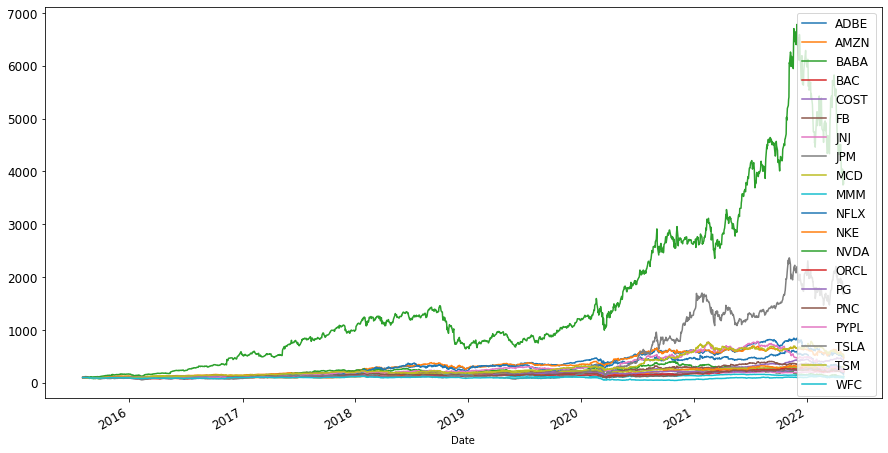

In [18]:
#normalize close values to have a better picture of graphs.
norm_close = close.div(close.iloc[0]).mul(100)
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [20]:
ret = close.pct_change().dropna()
ret

,ADBE,AMZN,BABA,BAC,COST,FB,JNJ,JPM,MCD,MMM,NFLX,NKE,NVDA,ORCL,PG,PNC,PYPL,TSLA,TSM,WFC
Date,,,,,,,,,,,,,,,,,,,,
2015-08-04,0.008108,-0.005850,0.011284,0.001688,-0.004673,-0.000850,-0.002200,-0.001021,-0.002816,0.001865,0.076315,0.008186,0.003943,-0.001259,-0.006414,0.001022,-0.011170,0.024193,-0.012431,-0.001554
2015-08-05,0.016086,0.009607,0.012045,0.003933,0.014153,0.025303,0.007215,0.003944,0.006657,0.004056,0.021131,0.008465,0.010309,-0.000505,-0.001844,0.006740,0.008216,0.014458,0.007459,0.003569
2015-08-06,-0.014272,-0.014059,-0.010774,-0.003358,-0.003063,-0.013687,-0.014425,-0.006984,-0.004509,-0.011589,0.022149,-0.013962,-0.006317,-0.008073,-0.000396,-0.000406,-0.010695,-0.088846,-0.015271,-0.002082
2015-08-07,0.006083,-0.012919,-0.001773,-0.003369,-0.008058,-0.008621,-0.002220,-0.002931,-0.004328,-0.002479,-0.023171,-0.005299,0.123716,0.006104,-0.003433,-0.007510,0.007207,-0.014708,-0.011748,-0.001043
2015-08-10,0.011247,0.002641,0.020934,0.016338,0.006815,-0.001591,0.009509,0.012344,0.004751,0.015783,-0.003967,0.007423,0.034813,0.008342,0.011923,0.021064,-0.002045,-0.005649,0.027579,0.008178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,0.012920,0.011943,-0.007515,-0.007189,-0.006105,0.015643,0.024623,-0.000315,0.010833,-0.003821,-0.026030,-0.008755,0.019831,0.010104,0.008062,-0.004329,0.020342,-0.006995,0.005853,-0.011006
2022-04-26,-0.035826,-0.045751,-0.021552,-0.022526,-0.025431,-0.032301,-0.007150,-0.029581,-0.017004,-0.029475,-0.054833,-0.057996,-0.055974,-0.032086,-0.016979,-0.017623,-0.046480,-0.121841,-0.036056,-0.027275
2022-04-27,-0.003057,-0.008781,0.051554,-0.005487,0.000578,-0.033158,-0.013970,-0.013006,-0.005793,-0.000069,-0.049698,0.005974,-0.019853,0.003355,-0.002691,0.005724,-0.013023,0.005808,-0.027056,0.000000


In [22]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
ADBE,1698.0,0.001140,0.020395,-0.147452,-0.006880,0.001766,0.010776,0.177193
AMZN,1698.0,0.001097,0.019618,-0.140494,-0.007763,0.001339,0.010698,0.135359
BABA,1698.0,0.000439,0.025217,-0.133422,-0.012158,0.000204,0.013327,0.367639
BAC,1698.0,0.000705,0.020962,-0.153974,-0.009025,0.000640,0.010737,0.177962
COST,1698.0,0.000931,0.013357,-0.085868,-0.005398,0.001315,0.007486,0.099595
FB,1698.0,0.000694,0.022111,-0.263901,-0.008607,0.000991,0.011586,0.175936
JNJ,1698.0,0.000527,0.012006,-0.100379,-0.004599,0.000474,0.005992,0.079977
JPM,1698.0,0.000605,0.018366,-0.149649,-0.007377,0.000159,0.008715,0.180125
MCD,1698.0,0.000739,0.013783,-0.158753,-0.004703,0.000901,0.006769,0.181254
MMM,1698.0,0.000203,0.014726,-0.129450,-0.005883,0.000591,0.007301,0.125986


In [23]:
#display only mean and std
summary = ret.describe().T.loc[:,["mean", "std"]]
summary

,mean,std
ADBE,0.001140,0.020395
AMZN,0.001097,0.019618
BABA,0.000439,0.025217
BAC,0.000705,0.020962
COST,0.000931,0.013357
FB,0.000694,0.022111
JNJ,0.000527,0.012006
JPM,0.000605,0.018366
MCD,0.000739,0.013783
MMM,0.000203,0.014726


In [24]:
#get annual mean and std
summary["mean"] = summary["mean"] * 252
summary["std"] = summary["std"] * np.sqrt(252)
summary

,mean,std
ADBE,0.287313,0.323763
AMZN,0.276464,0.311423
BABA,0.110674,0.400305
BAC,0.177770,0.332758
COST,0.234658,0.212038
FB,0.175002,0.350998
JNJ,0.132693,0.190593
JPM,0.152375,0.291558
MCD,0.186109,0.218800
MMM,0.051200,0.233760


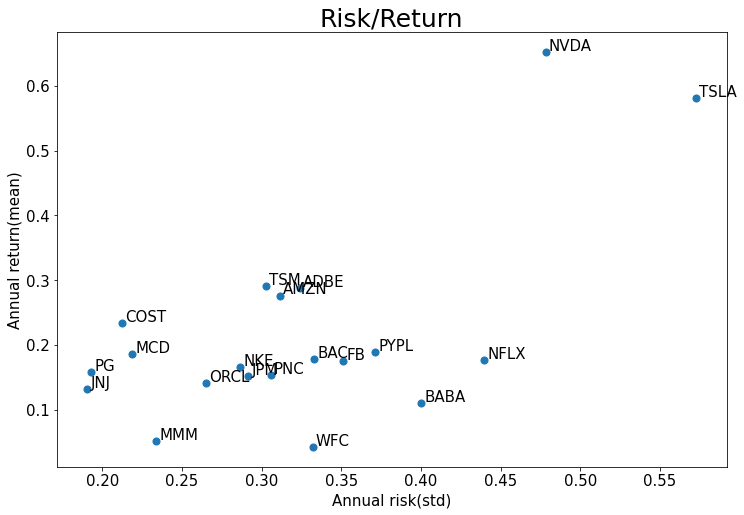

In [25]:
#plot a scatterplot. mean vs std
summary.plot.scatter(x = "std", y = "mean", figsize=(12,8), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, "std"] + 0.002, summary.loc[i, "mean"] + 0.002), size = 15)

plt.xlabel("Annual risk(std)", fontsize = 15)
plt.ylabel("Annual return(mean)", fontsize = 15)
plt.title("Risk/Return", fontsize = 25)
plt.show()

In [26]:
ret.cov()

,ADBE,AMZN,BABA,BAC,COST,FB,JNJ,JPM,MCD,MMM,NFLX,NKE,NVDA,ORCL,PG,PNC,PYPL,TSLA,TSM,WFC
ADBE,0.000416,0.000250,0.000211,0.000158,0.000134,0.000265,0.000088,0.000141,0.000111,0.000106,0.000291,0.000166,0.000369,0.000178,0.000085,0.000137,0.000302,0.000313,0.000199,0.000134
AMZN,0.000250,0.000385,0.000201,0.000125,0.000109,0.000266,0.000067,0.000106,0.000085,0.000085,0.000298,0.000130,0.000313,0.000128,0.000064,0.000096,0.000246,0.000270,0.000168,0.000103
BABA,0.000211,0.000201,0.000636,0.000147,0.000061,0.000218,0.000054,0.000129,0.000078,0.000092,0.000257,0.000149,0.000297,0.000117,0.000038,0.000118,0.000248,0.000273,0.000184,0.000120
BAC,0.000158,0.000125,0.000147,0.000439,0.000084,0.000160,0.000100,0.000355,0.000134,0.000172,0.000129,0.000176,0.000225,0.000174,0.000090,0.000355,0.000180,0.000190,0.000163,0.000368
COST,0.000134,0.000109,0.000061,0.000084,0.000178,0.000104,0.000070,0.000080,0.000070,0.000074,0.000115,0.000095,0.000156,0.000096,0.000076,0.000080,0.000114,0.000117,0.000089,0.000082
FB,0.000265,0.000266,0.000218,0.000160,0.000104,0.000489,0.000075,0.000139,0.000119,0.000102,0.000292,0.000156,0.000327,0.000146,0.000071,0.000134,0.000299,0.000263,0.000175,0.000134
JNJ,0.000088,0.000067,0.000054,0.000100,0.000070,0.000075,0.000144,0.000094,0.000070,0.000092,0.000061,0.000077,0.000096,0.000091,0.000084,0.000094,0.000083,0.000059,0.000069,0.000096
JPM,0.000141,0.000106,0.000129,0.000355,0.000080,0.000139,0.000094,0.000337,0.000127,0.000152,0.000110,0.000157,0.000192,0.000158,0.000084,0.000314,0.000160,0.000166,0.000148,0.000317
MCD,0.000111,0.000085,0.000078,0.000134,0.000070,0.000119,0.000070,0.000127,0.000190,0.000092,0.000081,0.000116,0.000141,0.000098,0.000073,0.000134,0.000133,0.000140,0.000096,0.000134
MMM,0.000106,0.000085,0.000092,0.000172,0.000074,0.000102,0.000092,0.000152,0.000092,0.000217,0.000090,0.000117,0.000154,0.000117,0.000077,0.000155,0.000112,0.000095,0.000106,0.000163


In [27]:
ret.corr()

,ADBE,AMZN,BABA,BAC,COST,FB,JNJ,JPM,MCD,MMM,NFLX,NKE,NVDA,ORCL,PG,PNC,PYPL,TSLA,TSM,WFC
ADBE,1.000000,0.625451,0.409337,0.368891,0.492066,0.587384,0.357527,0.377066,0.396643,0.351317,0.515473,0.449843,0.600411,0.521167,0.342743,0.349810,0.632361,0.424811,0.512211,0.313297
AMZN,0.625451,1.000000,0.405804,0.303808,0.417462,0.614088,0.283063,0.293443,0.314856,0.293404,0.548984,0.366512,0.528773,0.389906,0.266386,0.254679,0.536844,0.382076,0.448962,0.250079
BABA,0.409337,0.405804,1.000000,0.278134,0.181045,0.391032,0.178012,0.277954,0.223605,0.248236,0.368226,0.326184,0.390523,0.277224,0.124645,0.243347,0.420199,0.299978,0.383317,0.226797
BAC,0.368891,0.303808,0.278134,1.000000,0.300491,0.344474,0.397091,0.922769,0.465243,0.556985,0.222962,0.464807,0.356879,0.497051,0.353055,0.880041,0.367143,0.251865,0.406764,0.840256
COST,0.492066,0.417462,0.181045,0.300491,1.000000,0.350950,0.438077,0.328035,0.382191,0.378280,0.310822,0.394846,0.386403,0.430607,0.469875,0.312101,0.364029,0.243259,0.347881,0.292386
FB,0.587384,0.614088,0.391032,0.344474,0.350950,1.000000,0.282740,0.343510,0.390932,0.312932,0.477060,0.390076,0.490775,0.394835,0.264828,0.314344,0.579077,0.329618,0.415898,0.289999
JNJ,0.357527,0.283063,0.178012,0.397091,0.438077,0.282740,1.000000,0.428548,0.423383,0.518198,0.184090,0.355094,0.264996,0.455949,0.574682,0.408278,0.293946,0.135194,0.301390,0.380447
JPM,0.377066,0.293443,0.277954,0.922769,0.328035,0.343510,0.428548,1.000000,0.503192,0.563453,0.216081,0.474886,0.346233,0.513251,0.374824,0.889189,0.372059,0.249891,0.422284,0.825422
MCD,0.396643,0.314856,0.223605,0.465243,0.382191,0.390932,0.423383,0.503192,1.000000,0.454053,0.213488,0.466272,0.338559,0.426513,0.433297,0.505309,0.413878,0.282528,0.366408,0.465218
MMM,0.351317,0.293404,0.248236,0.556985,0.378280,0.312932,0.518198,0.563453,0.454053,1.000000,0.220862,0.440792,0.347724,0.476377,0.431284,0.547053,0.326625,0.178385,0.375835,0.529748


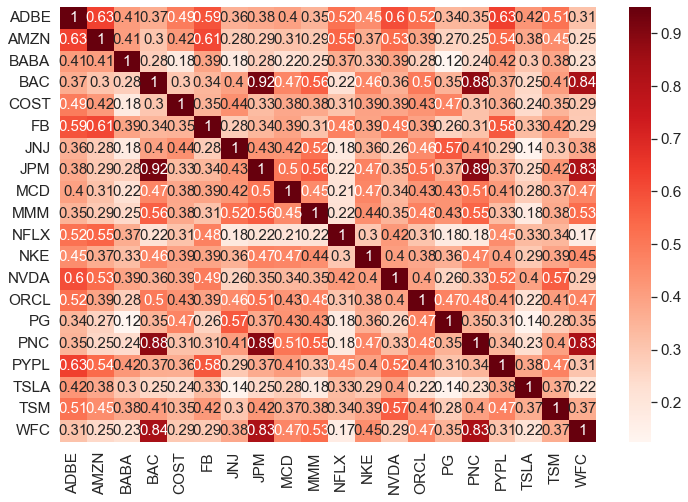

In [29]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws = {"size":15}, vmax = 0.95)
plt.show()

## My choices

Since it's a long-term investment, I chose to go with a low risk with higher return. Also, I found a correlation between each of companies and visualized it so that my choices will not be concentrated in any specific industries but a little spread out.

My top 5 choices are:
1. TSM (Taiwan Semiconductor)
2. COST (Costco)
3. NKE (Nike)
4. PG (Proctor & Gamble)
5. NVDA (Nvidia)